In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ordered roughly by accuracy
cases = ['ADHD','ASD','SZ','BIP']

case_labels =       ['BIP                  n=44',
                    'SZ                   n=283',
                    'ASD                 n=472',
                    'ADHD              n=223']
case_labels.reverse()

p_single = '../results_paper/baseline/mlp/'
p_mtl = '../results_paper/mtl_psych/mlp/'

# Load Data

In [3]:
# Single Task
st_data_conn = []
for case in cases:
    folds_conn = []
    for fold in range(5):
        # Connectomes
        p_parent = os.path.join(p_single, f"{case}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        folds_conn.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[case])

    st_data_conn.append(folds_conn)

st_data_conn = dict(zip(cases,st_data_conn))

In [4]:
# Multi-task
mtl_data_conn = []
for fold in range(5):
    # Connectomes
    p_parent = os.path.join(p_mtl, f"fold_{fold}")
    file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
    mtl_data_conn.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))


# Get Accuracy

In [5]:
# Single Task
st_acc_conn = []
st_acc_conn_std = []
for case in cases:
    # Connectomes
    vals = [st_data_conn[case][fold]['Accuracy/test'].iloc[-1] for fold in range(5)]
    st_acc_conn.append(np.mean(vals))
    st_acc_conn_std.append(np.std(vals))


st_acc_conn = pd.Series(st_acc_conn,index=cases)
st_acc_conn_std = pd.Series(st_acc_conn_std,index=cases)

In [6]:
st_acc_conn

ADHD    55.206897
ASD     61.085219
SZ      75.709892
BIP     79.012097
dtype: float64

In [7]:
# Multi-task
mtl_acc_conn = []
for fold in range(5):
    # Connectomes
    df = mtl_data_conn[fold].transpose().reset_index()
    df = df[df['level_1']=='Accuracy/test'].set_index('level_0')[99]
    mtl_acc_conn.append(df)
    
mtl_acc_conn_std = pd.concat(mtl_acc_conn,axis=1).std(axis=1)
mtl_acc_conn = pd.concat(mtl_acc_conn,axis=1).mean(axis=1)

# Tables

In [8]:
# Connectomes
df_conn = pd.concat([st_acc_conn,mtl_acc_conn,st_acc_conn_std,mtl_acc_conn_std],axis=1)
df_conn.columns = ['ST','MTL','ST_std','MTL_std']
df_conn

,ST,MTL,ST_std,MTL_std
ADHD,55.206897,60.068966,2.576093,5.570069
ASD,61.085219,61.404931,2.463449,2.453818
SZ,75.709892,76.178642,1.652202,1.354036
BIP,79.012097,85.403226,3.023118,6.076213


In [9]:
df_conn.mean()

ST         67.753526
MTL        70.763941
ST_std      2.428715
MTL_std     3.863534
dtype: float64

# Plots

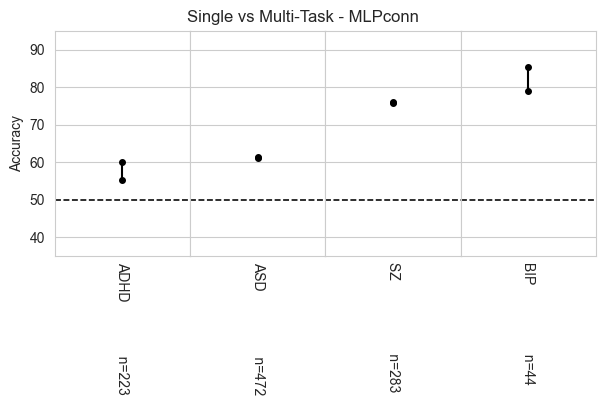

In [12]:
###############
# CONNECTOMES #
###############
title = 'Single vs Multi-Task - MLPconn'
fig,ax = plt.subplots(1,len(cases),figsize=(6,4),sharey=True,sharex=True)
plt.yticks([40,50,60,70,80,90])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,case in enumerate(cases):
    st_acc = df_conn.loc[case]['ST']
    mtl_acc = df_conn.loc[case]['MTL']
    if st_acc > mtl_acc:
        mfc = 'white'
        ls =''
    else:
        mfc = colors[0]
        ls = '-'

    ax[j].plot(5,mtl_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot(5,st_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot((5,5),(st_acc,mtl_acc),color=colors[0],ls=ls)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(case_labels[j],rotation=270)

    lines = ax[j].get_ygridlines()
    b = lines[1]
    b.set_color('black')
    b.set_linewidth(1.15)
    b.set_linestyle('--')

ax[0].set_ylabel('Accuracy')
plt.suptitle(title)
plt.ylim(35,95)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
#plt.savefig(os.path.join('/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/mtl/','figures/st_vs_mtl.png'),dpi=300)

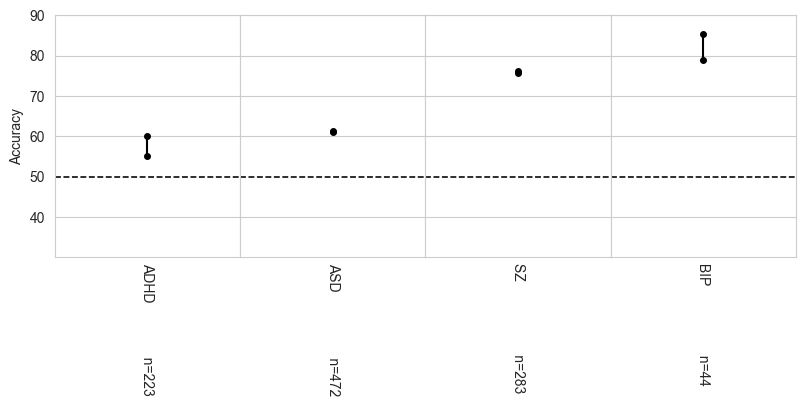

In [11]:
###############
# CONNECTOMES #
###############
title = 'Single vs Multi-Task - MLPconn'
fig,ax = plt.subplots(1,len(cases),figsize=(8,4),sharey=True,sharex=True)
plt.yticks([40,50,60,70,80,90])
sns.set_style('whitegrid')
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']

for j,case in enumerate(cases):
    st_acc = df_conn.loc[case]['ST']
    mtl_acc = df_conn.loc[case]['MTL']
    if st_acc > mtl_acc:
        mfc = 'white'
        ls =''
    else:
        mfc = colors[0]
        ls = '-'

    ax[j].plot(5,mtl_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot(5,st_acc,marker='o',color=colors[0],ms=4,markerfacecolor=mfc)
    ax[j].plot((5,5),(st_acc,mtl_acc),color=colors[0],ls=ls)
    ax[j].set_xticklabels([])
    ax[j].set_xticks([])
    ax[j].set_xlabel(case_labels[j],rotation=270)

    lines = ax[j].get_ygridlines()
    b = lines[1]
    b.set_color('black')
    b.set_linewidth(1.15)
    b.set_linestyle('--')

ax[0].set_ylabel('Accuracy')
#plt.suptitle(title)
plt.ylim(30,90)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
#plt.savefig(os.path.join('/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results_paper/mtl_psych/','figures/st_vs_mtl.png'),dpi=300)